The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Invoice id: Computer generated sales slip invoice identification number


Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Load Dataset

In [204]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [205]:
df = pd.read_csv("/Users/lilygoldwasser/Documents/metis/Business_Student/supermarket_sales - Sheet1.csv")

In [206]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [207]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [208]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [209]:
df.shape

(1000, 17)

Check for null values

In [211]:
df.isnull().sum() #no null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Change to Datetime format

In [212]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])

In [213]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

add day/month/year and look at shopping habits

In [214]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [215]:
df['Month']=df['Date'].dt.month
df['Month']

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: int64

In [423]:
df['Weekday']=df['Date'].dt.weekday
df['Weekday']

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Weekday, Length: 1000, dtype: int64

In [240]:
df['Date'].dt.year.nunique()
#only 1 year: 2019

1

In [241]:
df['Time']

0     2022-02-08 13:08:00
1     2022-02-08 10:29:00
2     2022-02-08 13:23:00
3     2022-02-08 20:33:00
4     2022-02-08 10:37:00
              ...        
995   2022-02-08 13:46:00
996   2022-02-08 17:16:00
997   2022-02-08 13:22:00
998   2022-02-08 15:33:00
999   2022-02-08 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [242]:
df['Hour']=df['Time'].dt.hour
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int64

In [227]:
print("# unique values in Branch =",df['Branch'].nunique())
print("# unique values in City =",df['City'].nunique())
print("# unique values in Customer =",df['Customer type'].nunique())
print("# unique values in Gender =",df['Gender'].nunique())
print("# unique values in Product line =",df['Product line'].nunique())
print("# unique values in Payment =",df['Payment'].nunique())
print("# unique values in Hour =",df['Hour'].nunique())

# unique values in Branch = 3
# unique values in City = 3
# unique values in Customer = 2
# unique values in Gender = 2
# unique values in Product line = 6
# unique values in Payment = 3
# unique values in Hour = 11


In [253]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Hour'],
      dtype='object')

## EDA

Histogram: data distribution

<function matplotlib.pyplot.show(close=None, block=None)>

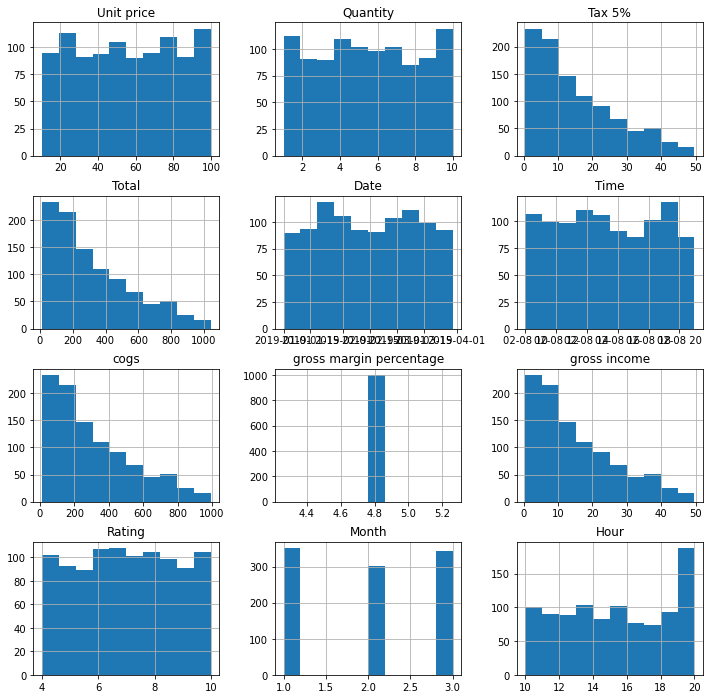

In [254]:
df.hist(figsize=(12,12))
plt.show

Text(0.5, 1.0, 'Gender count')

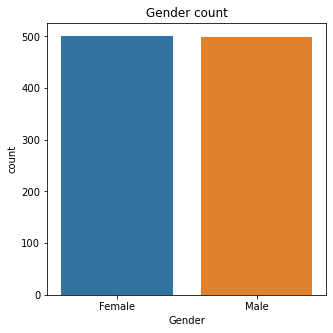

In [234]:
plt.figure(figsize=(5,5))
sns.countplot(x="Gender", data=df)
plt.title("Gender count")

#more F purchases than M

In [368]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Hour'],
      dtype='object')

Text(0.5, 1.0, 'Payment Method by Gender')

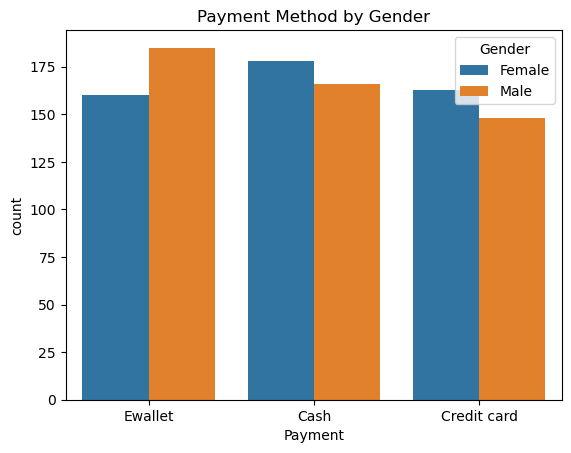

In [371]:
#payment method
sns.countplot(x="Payment",hue="Gender", data=df)
plt.title("Payment Method by Gender")

Text(0.5, 1.0, 'Rating by Branch')

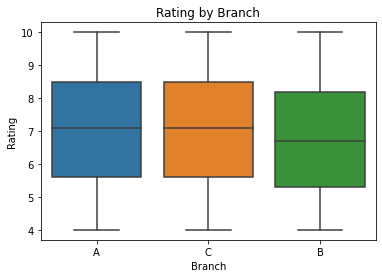

In [255]:
#Rating by Branch

sns.boxplot(x='Branch',y='Rating',data=df)
plt.title("Rating by Branch")

#branch B had lowest ratings

In [256]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.027387,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.014524,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.042880,-0.030588
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,1.000000,0.043762
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,0.043762,1.000000


Heatmap: color-coding to represent different values

<AxesSubplot:>

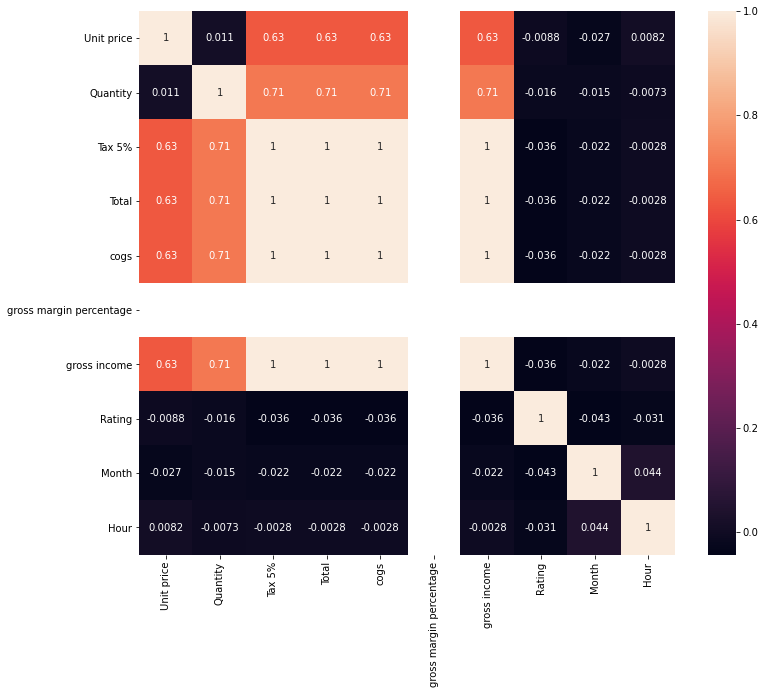

In [257]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.

Also, the above mentioned all has a good correlation of 0.71 with Quantity
0.63 corr with unit price and income, cogs, total, tax

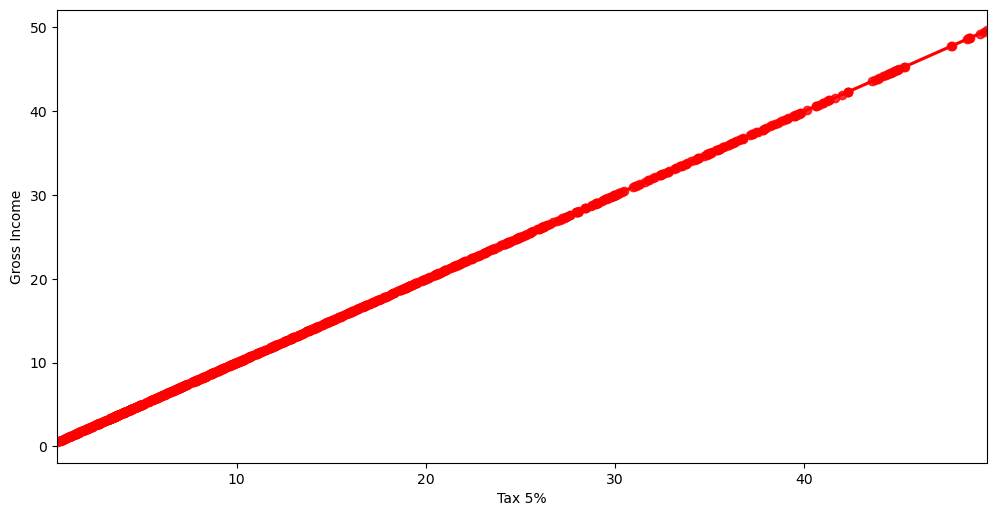

In [261]:
#Tax 5%: tax fee for customer buying
#gross income: gross income

plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

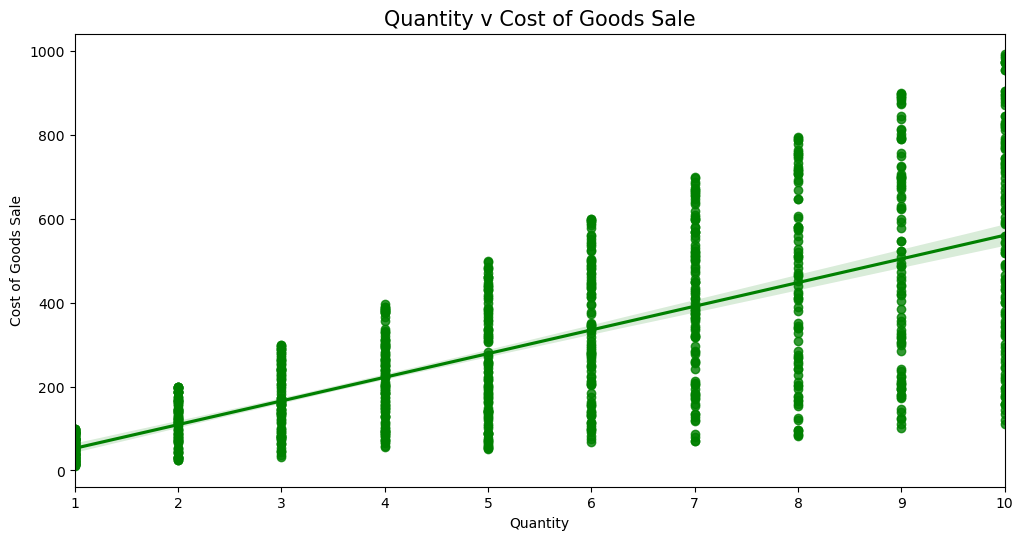

In [270]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

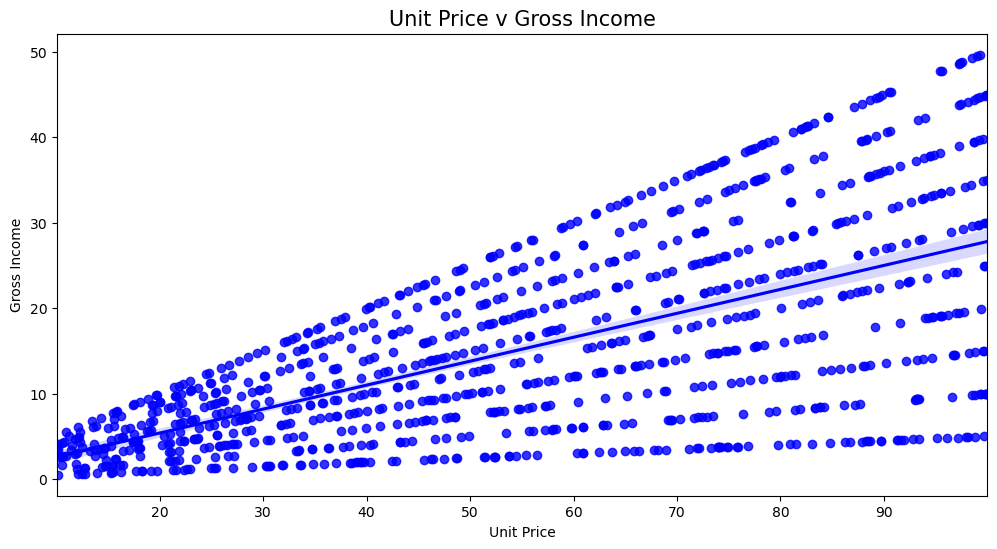

In [186]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


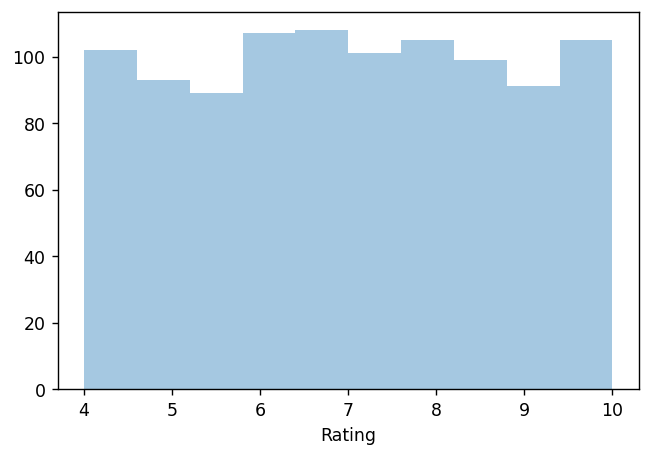

In [271]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(df['Rating'],kde=False)
plt.show()

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


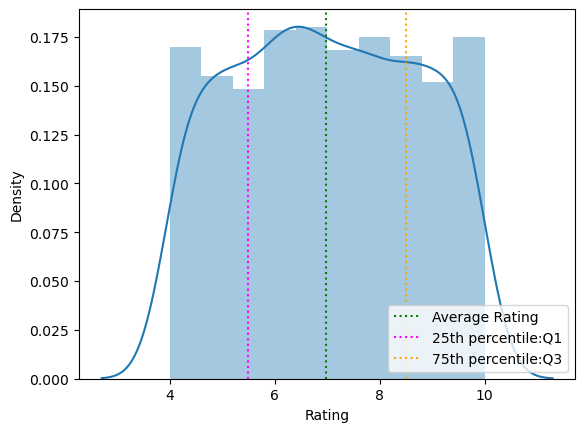

In [328]:
# To find Mean Rating
#what does customer rating look like? is it skewed?
sns.distplot(df['Rating'],kde=True) #want to see  density
plt.axvline(x=np.mean(df['Rating']),c='green', ls=':',label='Average Rating')
plt.axvline(x=np.percentile(df['Rating'],25),c='magenta', ls=':', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls=':',label = '75th percentile:Q3' )

plt.legend(loc= 4)
plt.show()

<AxesSubplot:xlabel='gross income'>

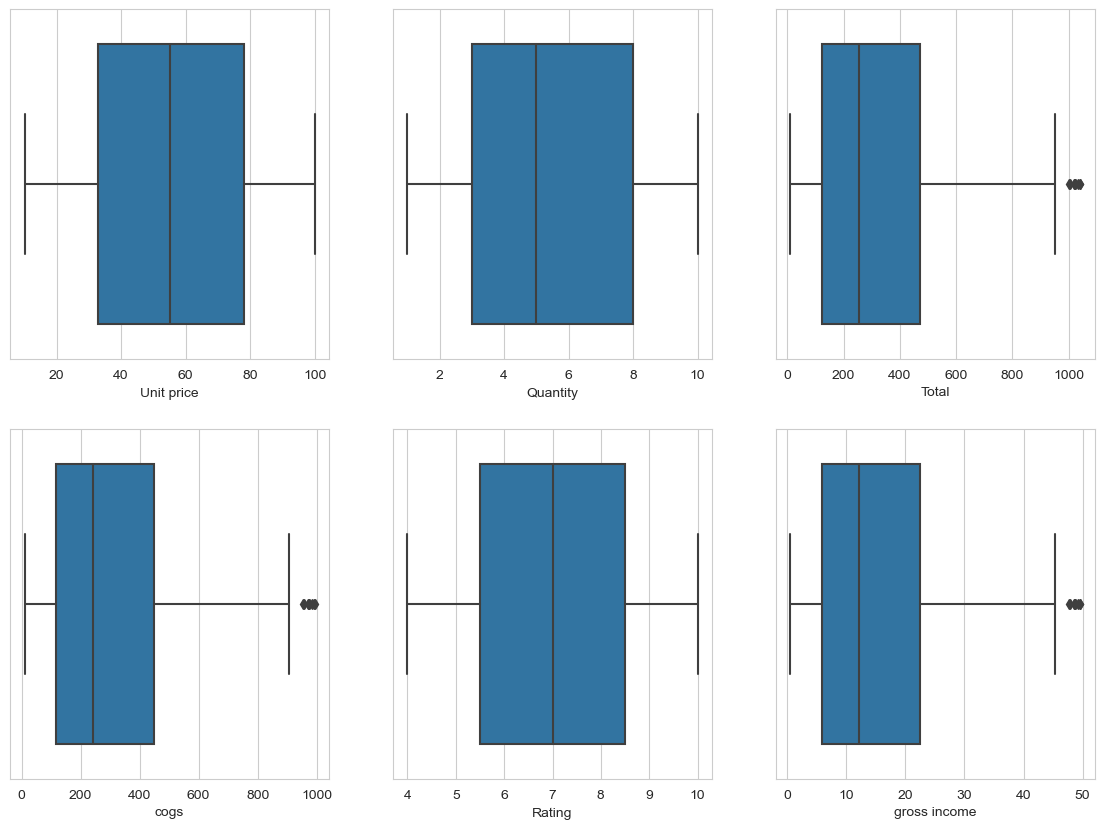

In [331]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

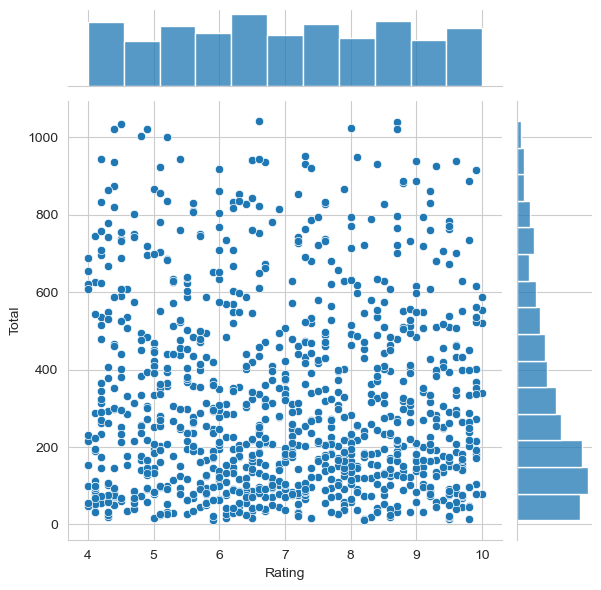

In [332]:
sns.jointplot(data=df, x="Rating", y="Total")

### LILY HERE

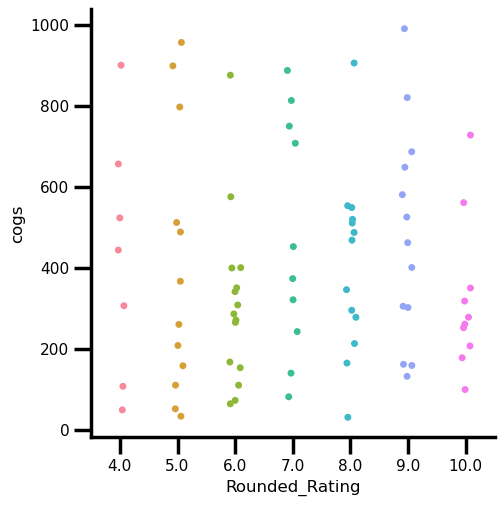

In [441]:
sns.catplot(x='Rounded_Rating', y= 'cogs', data=df[100:180])
#cogs = cost of goods sold

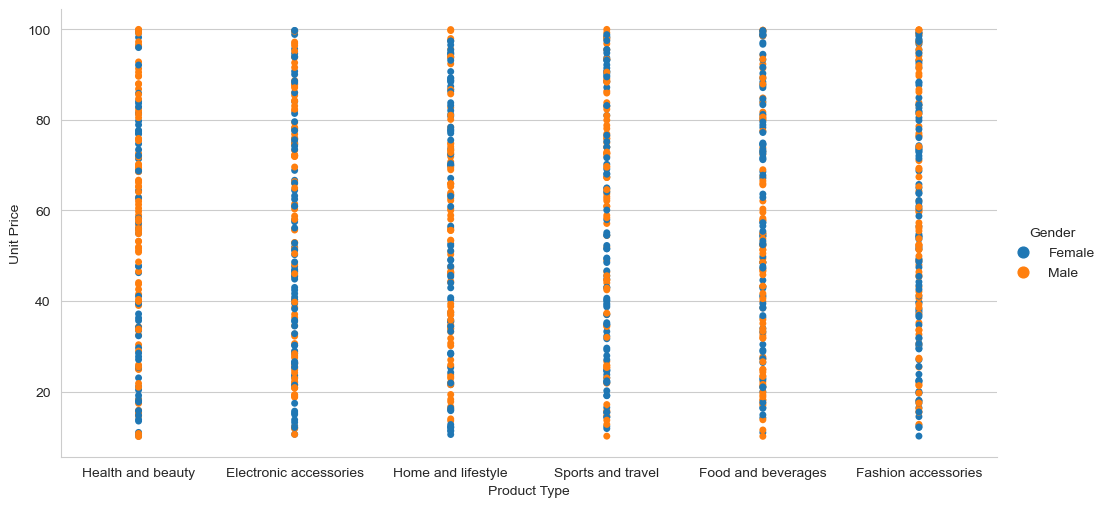

In [334]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

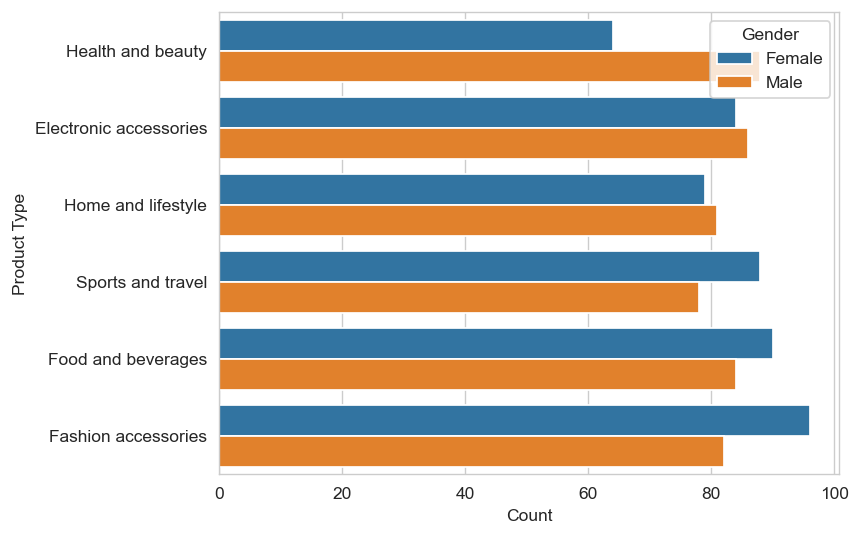

In [335]:
#LILY HERE!

plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

# , In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.


Text(0.5, 1.0, 'Price per Rating')

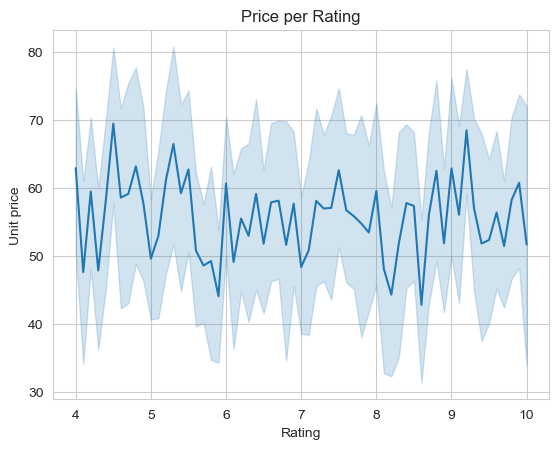

In [336]:
sns.lineplot(x='Rating', y= 'Unit price', data=df).set_title("Price per Rating")
#lineplot shows marks above/below a num line, showing avg

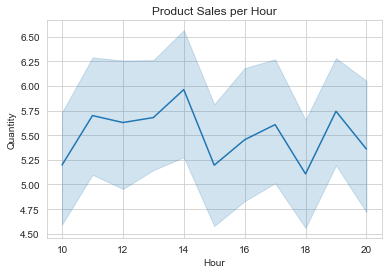

In [284]:
genderCount  = sns.lineplot(x="Hour", 
                            y = 'Quantity',data =df).set_title("Product Sales per Hour")

Barplot

## LILY HERE

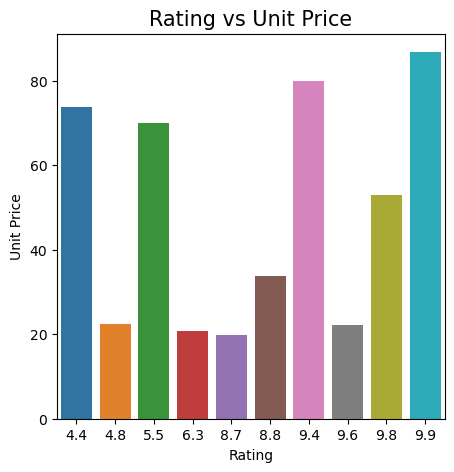

In [337]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180]) #just a small subset of data
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

Rating vs Gender

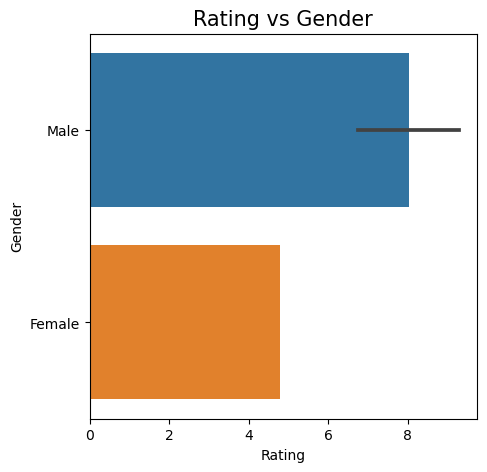

In [338]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

Rating vs Quantity

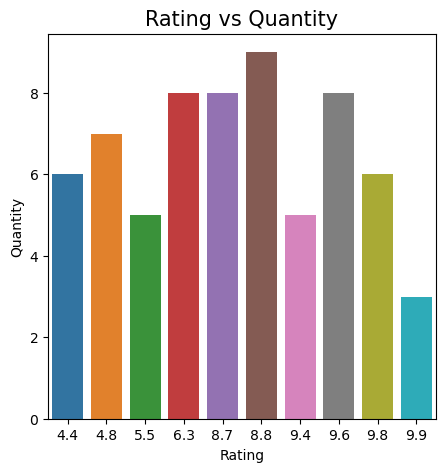

In [339]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

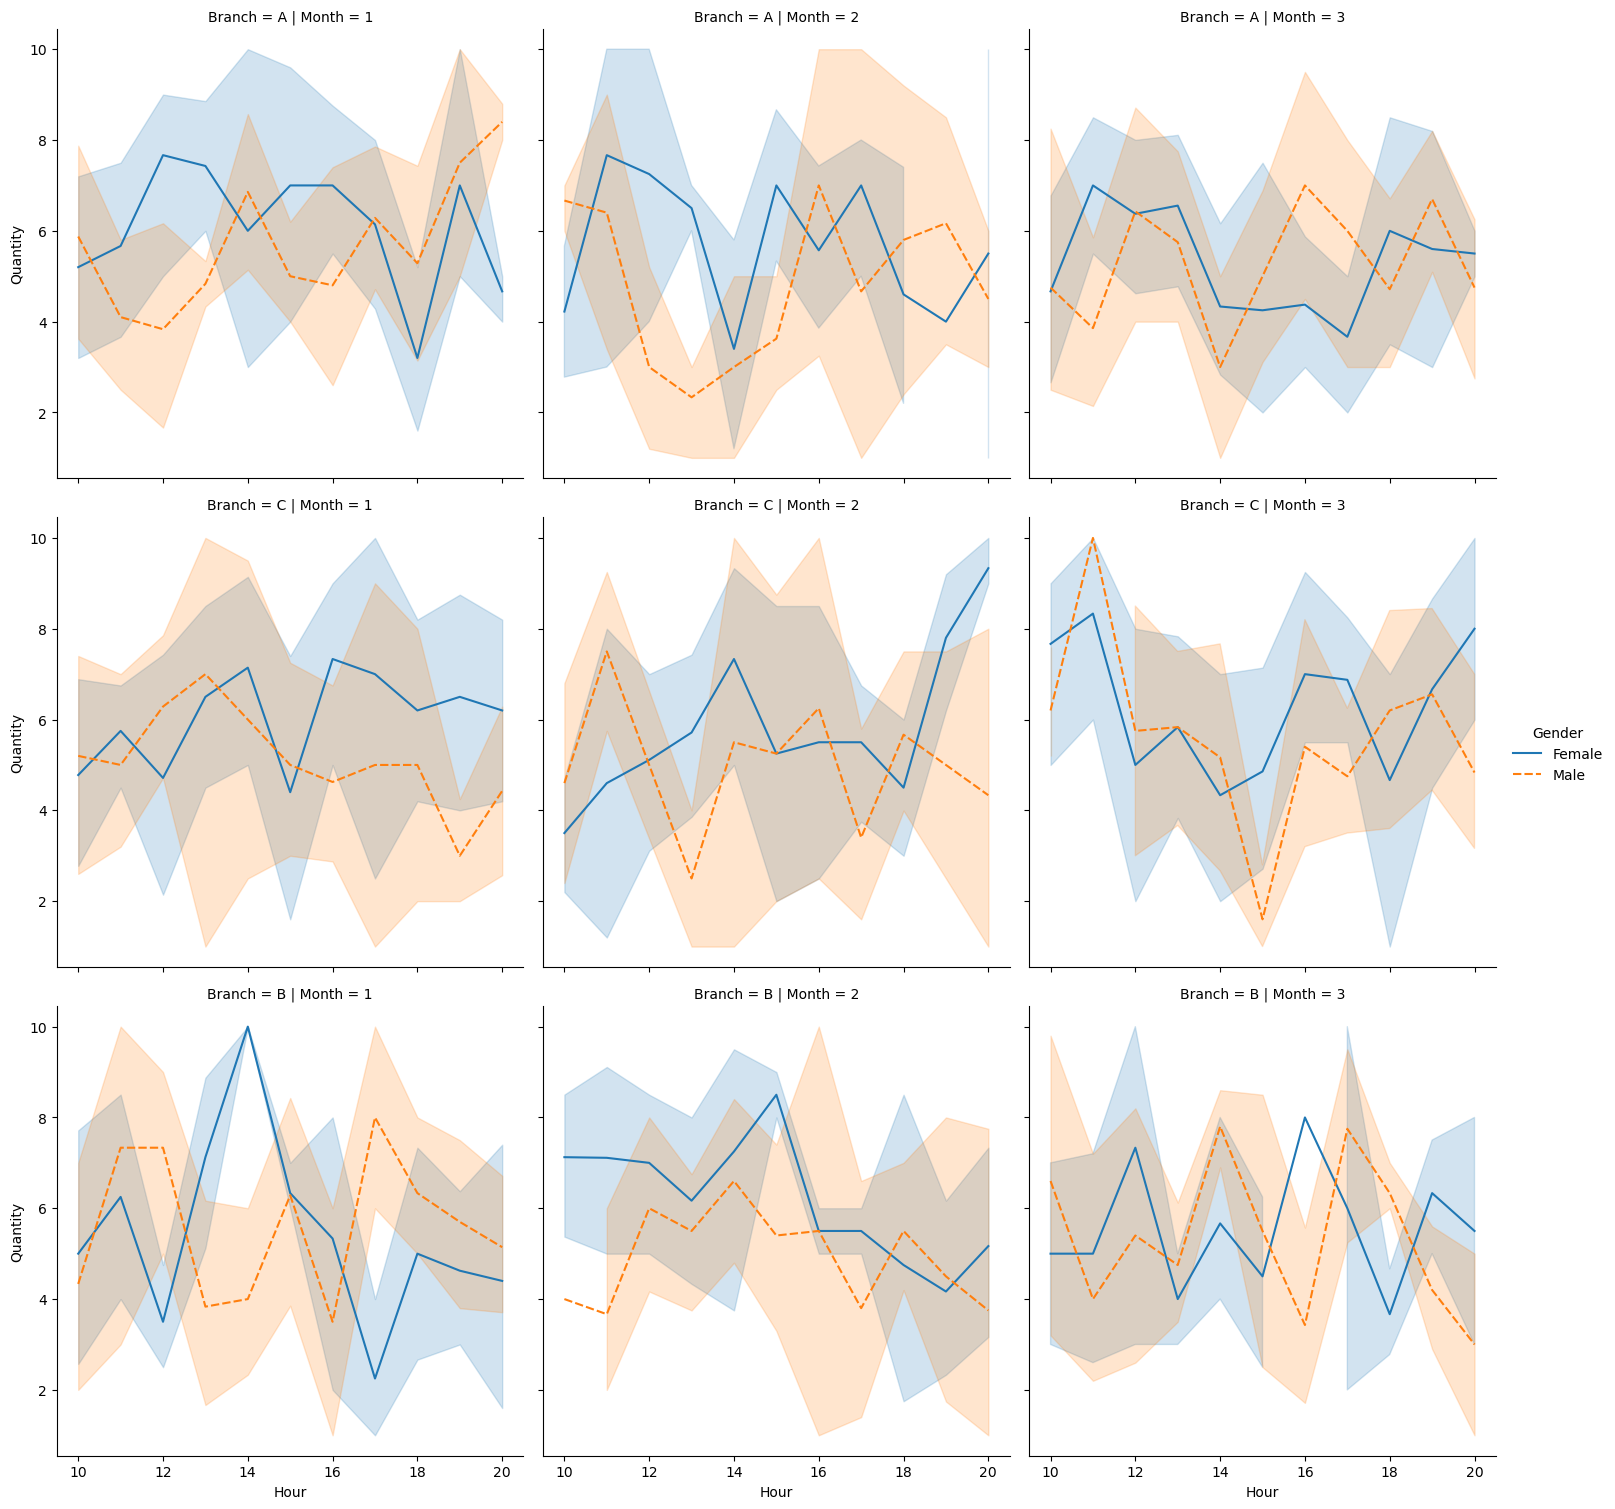

In [340]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Month' , 
                           row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

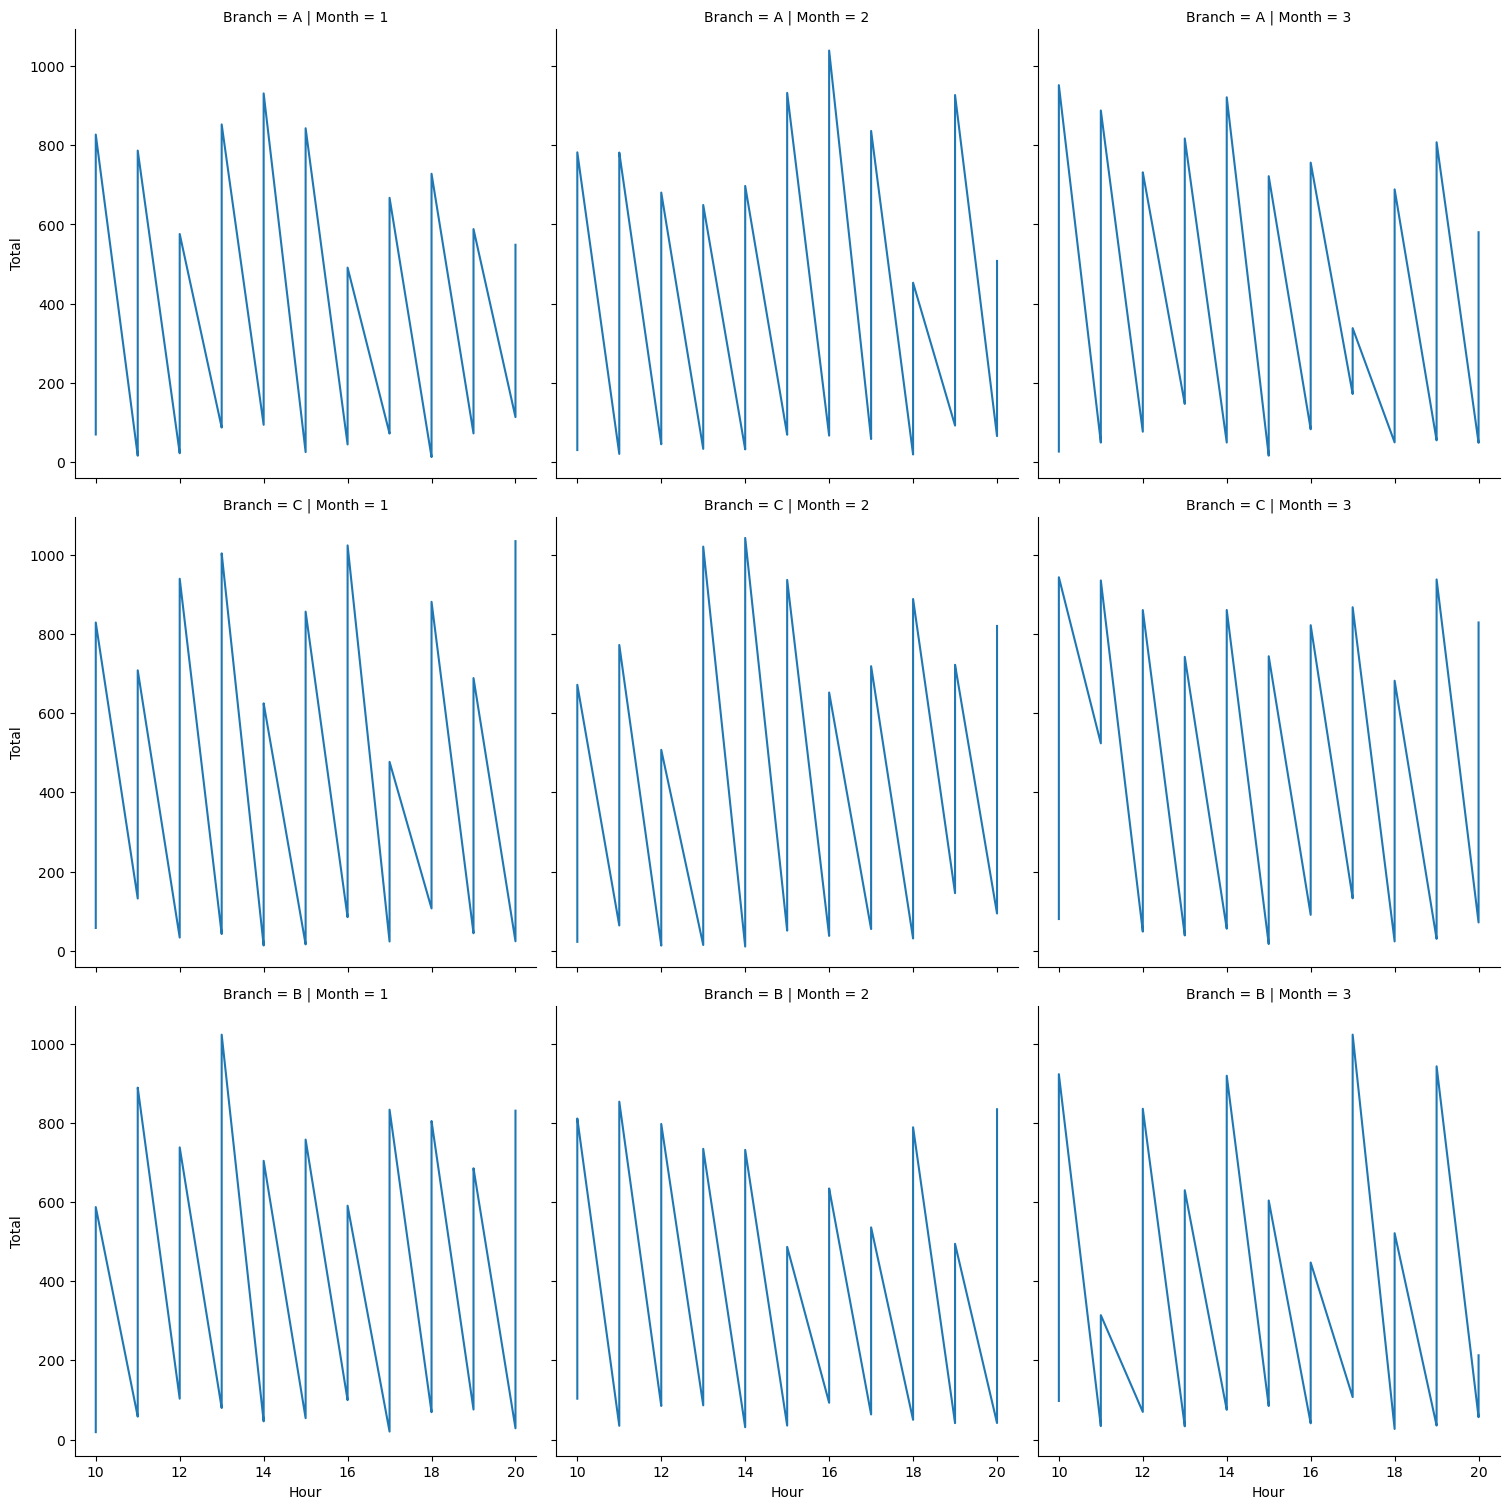

In [341]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'Month' , row= 'Branch', estimator = None, kind="line", data =df)

## Product Analysis

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

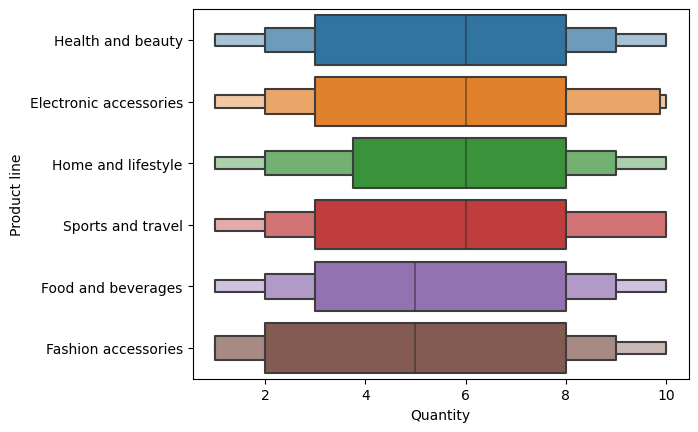

In [342]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df)

#Here we can interpret that food and bevarages, fashion accesories has less mean quantity 
#whereas we have seen that both of these categories had high rating. 
#So we need to increase our supply, matey.

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

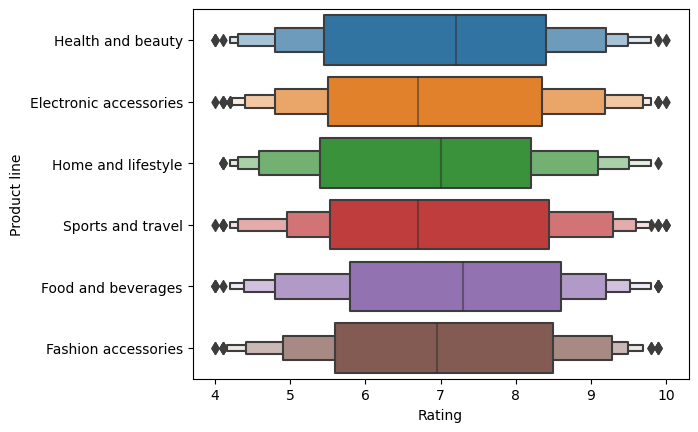

In [343]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df)
#food and  bev have the highest average rating, whereas sports have the lowest

<AxesSubplot:xlabel='count', ylabel='Product line'>

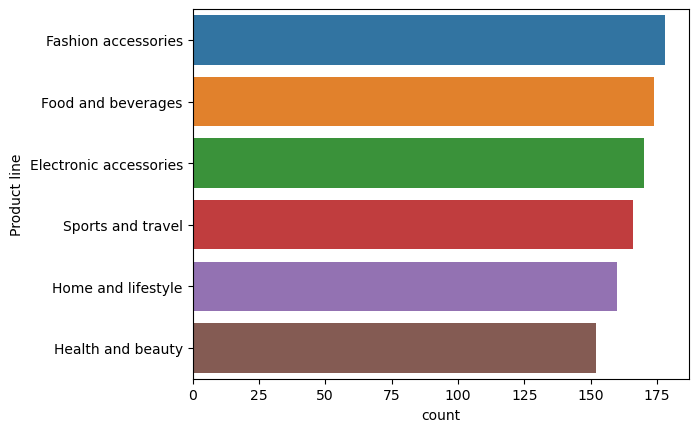

In [344]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

#top product line item type sold: Fashion Accessories is the highest while Health and beauty is the lowest

<AxesSubplot:xlabel='Total', ylabel='Product line'>

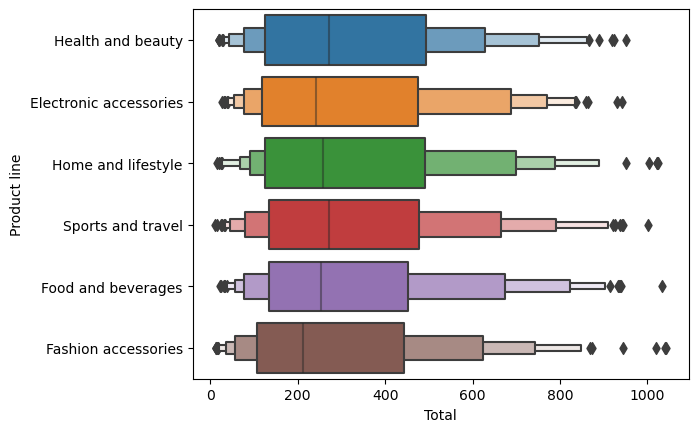

In [345]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df)

In [442]:
# sns.violinplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

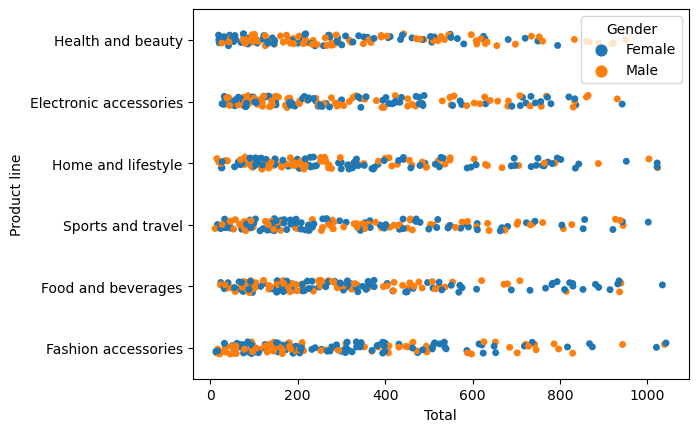

In [348]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df)
#Total = total price + tax

## Payment Channel

How do customers make payment in this business?

Text(0.5, 1.0, 'Payment Channel')

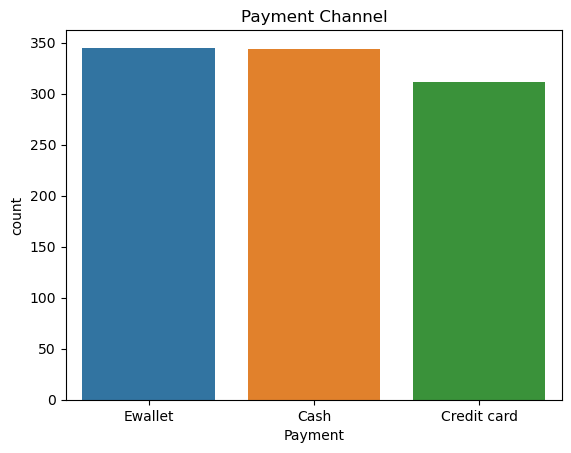

In [349]:
 sns.countplot(x="Payment", data =df).set_title("Payment Channel") 
    
# Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Gender')

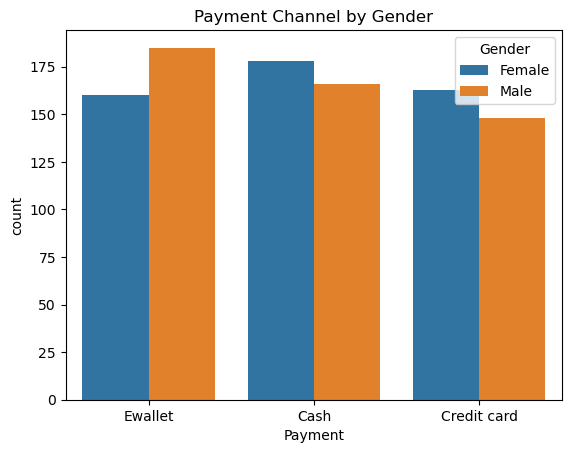

In [350]:
 sns.countplot(x="Payment", hue = "Gender", data =df).set_title("Payment Channel by Gender") 


## Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are

Text(0.5, 1.0, 'Customer Type by Gender')

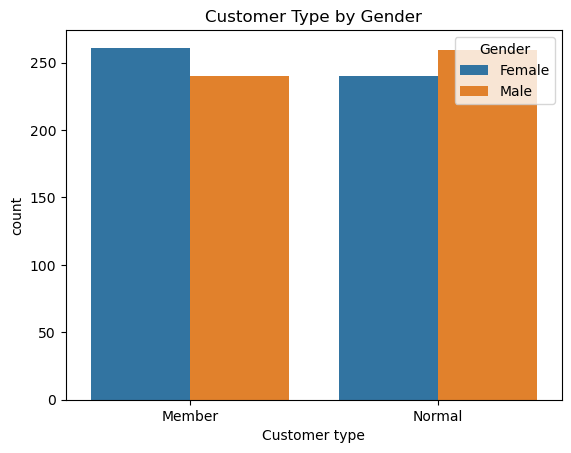

In [352]:
 sns.countplot(x="Customer type", hue = "Gender", data =df).set_title("Customer Type by Gender") 

## Does customer type influence sales?

In [353]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

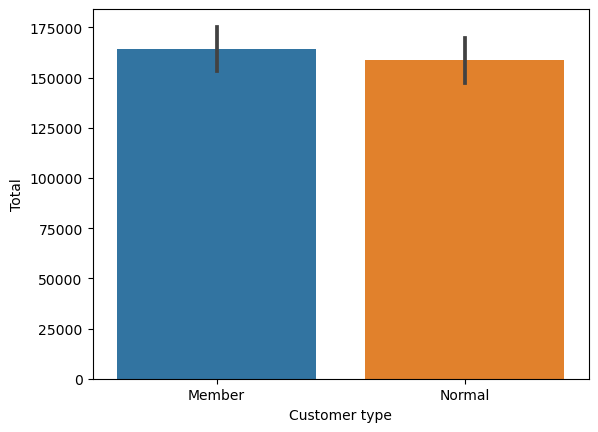

In [354]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=df)

In [355]:
grp=df.groupby(['Product line']).mean()
grp

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Hour
Product line,,,,,,,,,,
Electronic accessories,53.551588,5.711765,15.220597,319.632538,304.411941,4.761905,15.220597,6.924706,2.047059,14.988235
Fashion accessories,57.153652,5.067416,14.528062,305.089298,290.561236,4.761905,14.528062,7.029213,1.943820,15.056180
Food and beverages,56.008851,5.471264,15.365310,322.671517,307.306207,4.761905,15.365310,7.113218,2.000000,15.385057
Health and beauty,54.854474,5.618421,15.411572,323.643020,308.231447,4.761905,15.411572,7.003289,2.052632,14.868421
Home and lifestyle,55.316937,5.693750,16.030331,336.636956,320.606625,4.761905,16.030331,6.837500,2.025000,14.450000
Sports and travel,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905,15.812630,6.916265,1.897590,14.656627


In [356]:
grp[['Unit price']].to_csv("product inline.csv")
grp

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Hour
Product line,,,,,,,,,,
Electronic accessories,53.551588,5.711765,15.220597,319.632538,304.411941,4.761905,15.220597,6.924706,2.047059,14.988235
Fashion accessories,57.153652,5.067416,14.528062,305.089298,290.561236,4.761905,14.528062,7.029213,1.943820,15.056180
Food and beverages,56.008851,5.471264,15.365310,322.671517,307.306207,4.761905,15.365310,7.113218,2.000000,15.385057
Health and beauty,54.854474,5.618421,15.411572,323.643020,308.231447,4.761905,15.411572,7.003289,2.052632,14.868421
Home and lifestyle,55.316937,5.693750,16.030331,336.636956,320.606625,4.761905,16.030331,6.837500,2.025000,14.450000
Sports and travel,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905,15.812630,6.916265,1.897590,14.656627


## product in each category


In [357]:
#COUNT
grp = df.groupby(['Product line']).count()
grp

,Invoice ID,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
Product line,,,,,,,,,,,,,,,,,,
Electronic accessories,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
Fashion accessories,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178
Food and beverages,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Health and beauty,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Home and lifestyle,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Sports and travel,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


Text(0.5, 1.0, 'Product Gross')

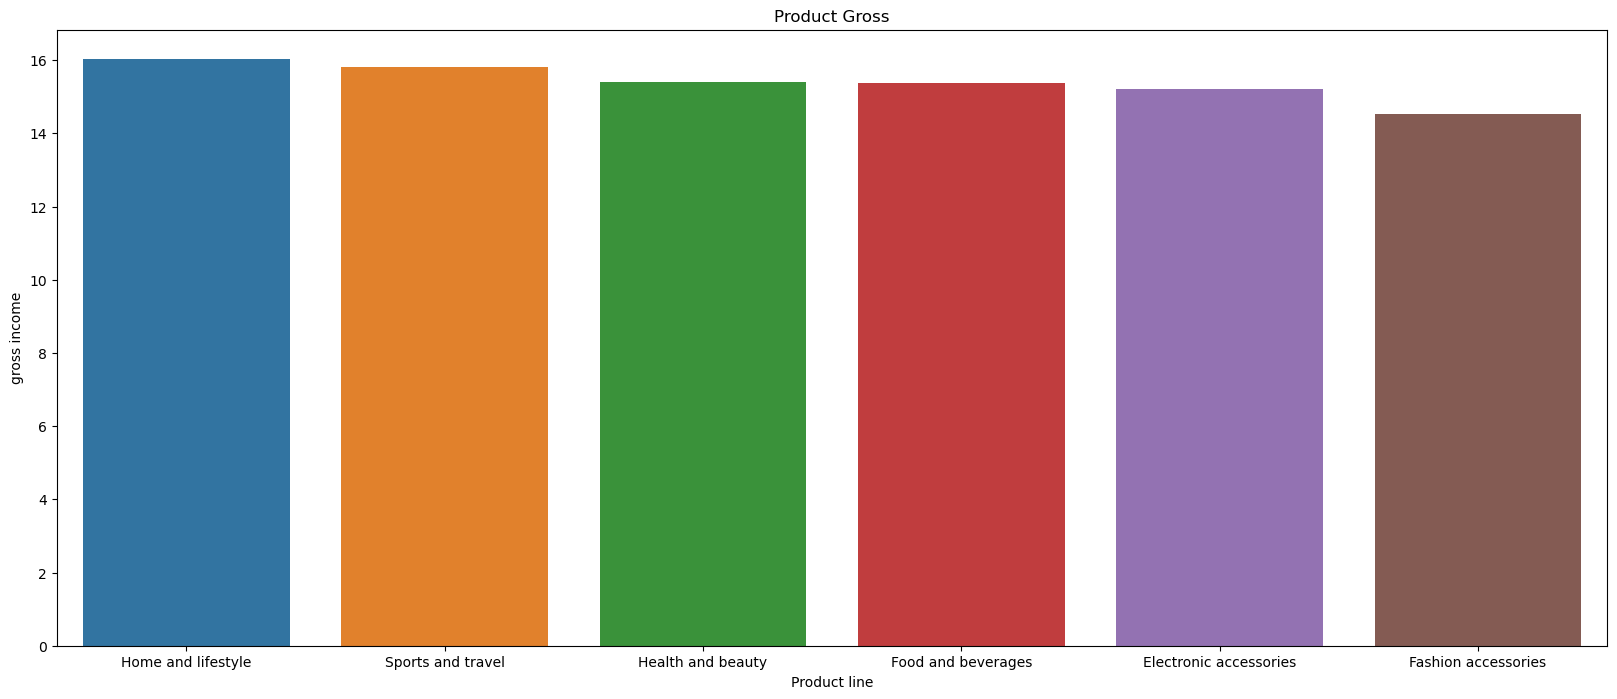

In [367]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).mean().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat).set_title('Product Gross')

In [374]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Hour'],
      dtype='object')

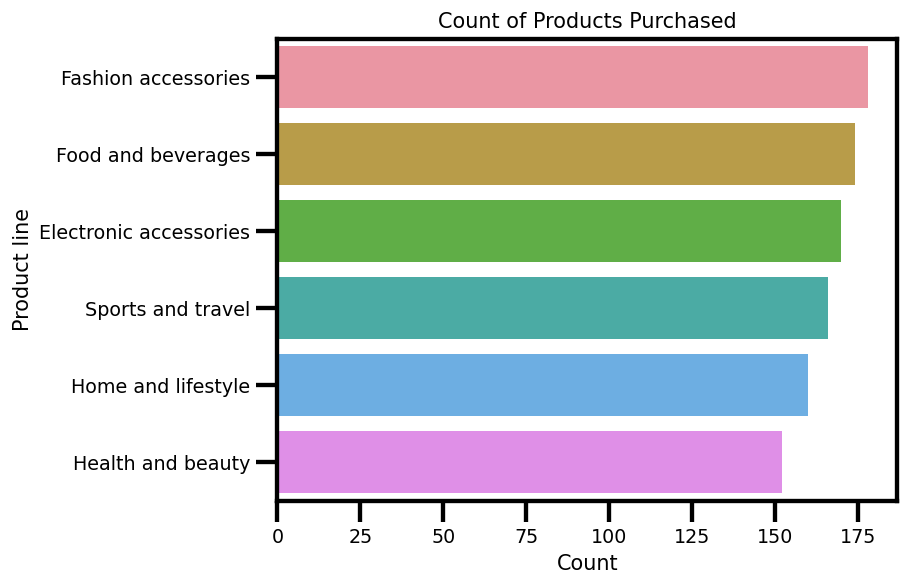

In [445]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', data = df, order=df['Product line'].value_counts().index).set_title('Count of Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product line')
plt.show()

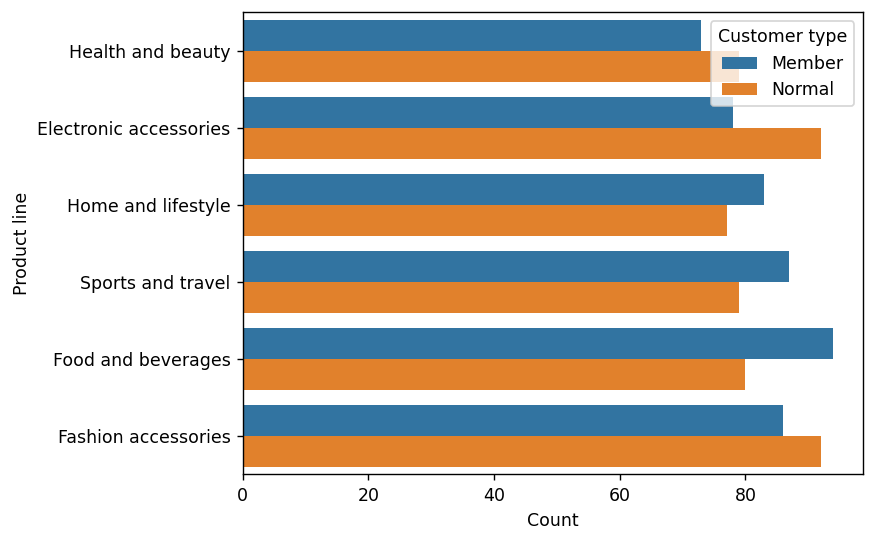

In [376]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Customer type", data = df) 
plt.xlabel('Count')
plt.ylabel('Product line')
plt.show()

Text(0.5, 1.0, 'Income vs Unit Price')

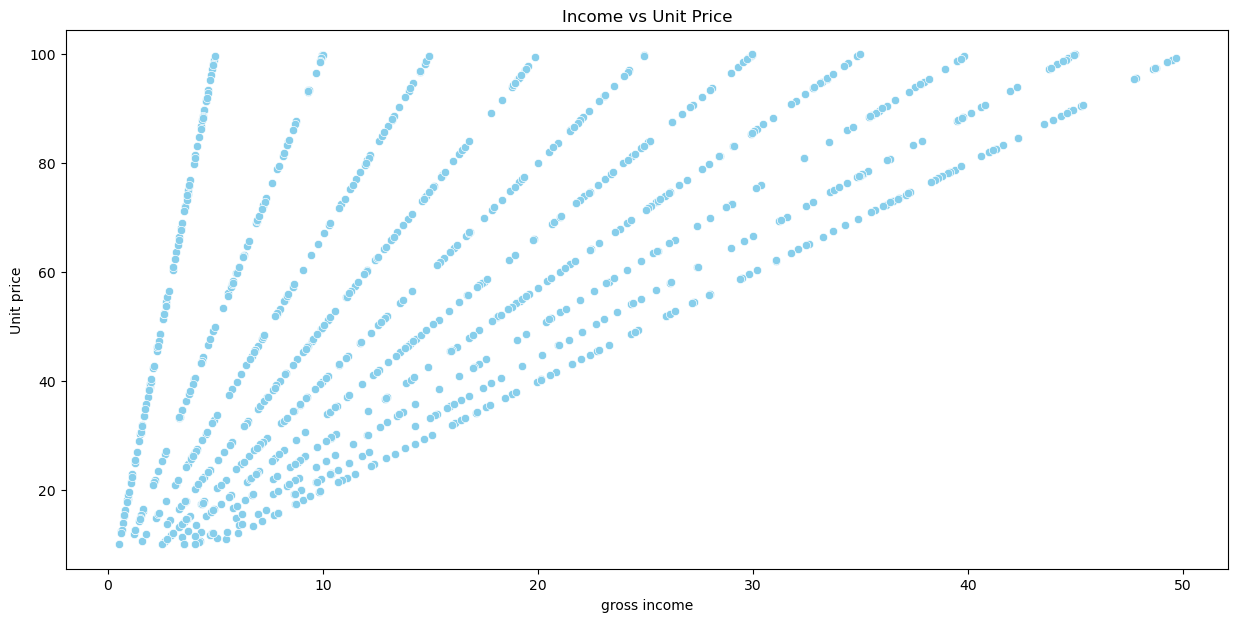

In [384]:
#GROSS INCOME AND UNIT PRICE
plt.figure(figsize=(15, 7))
sns.set_palette(['skyblue'])
sns.scatterplot(data = df, x = 'gross income', y = 'Unit price').set_title('Income vs Unit Price')

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='count'>

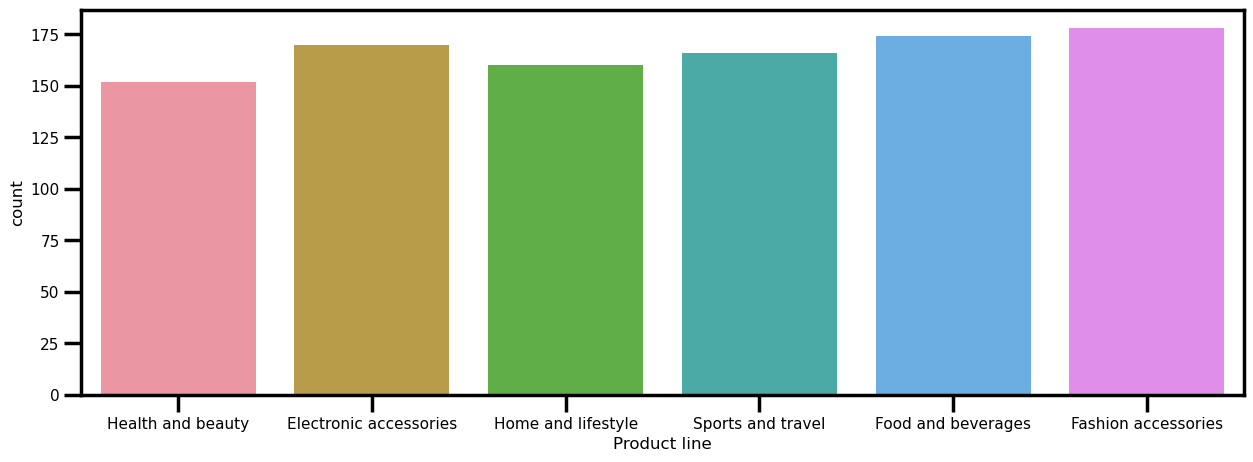

In [417]:
plt.figure(figsize=(15,5))
sns.set_context("poster", font_scale=.5)
sns.countplot(df['Product line'])

# lily: Question 9: What is the spending pattern of females and males and in which category do they spend a lot?

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

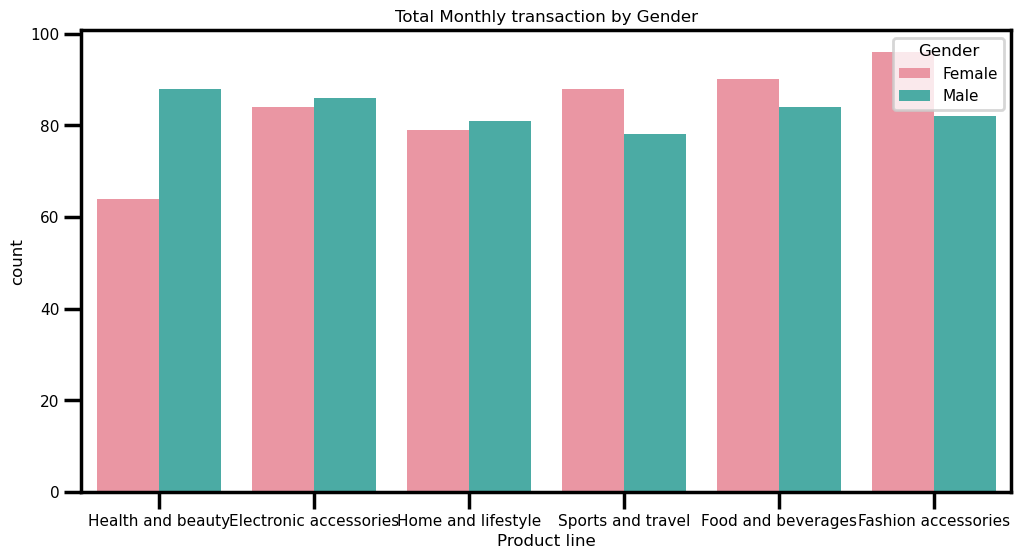

In [418]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='Weekday', ylabel='count'>

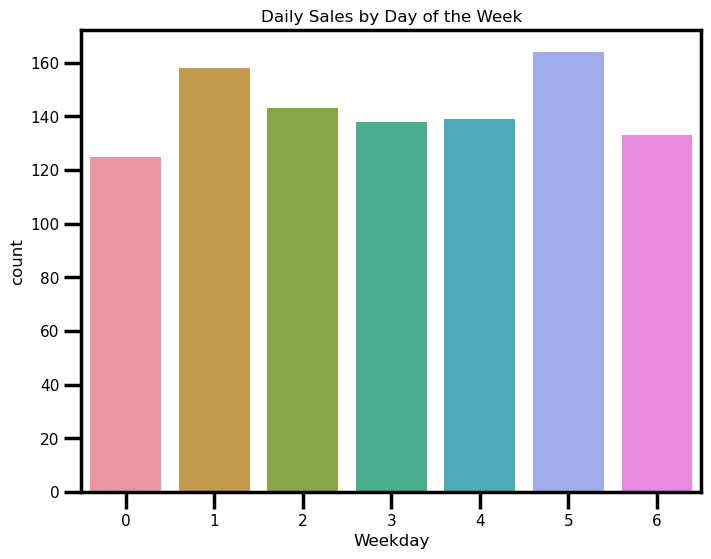

In [424]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['Weekday'])

In [429]:
df.to_csv(r'C:\Users\lilygoldwasser\Documents\metis\Business_Student\export_df.csv',index = False, header=True)

In [430]:
df.to_csv('export.csv')

In [438]:
df['Rounded_Rating'] = df['Rating'].round()
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Hour', 'Weekday', 'Rounded_Rating'],
      dtype='object')

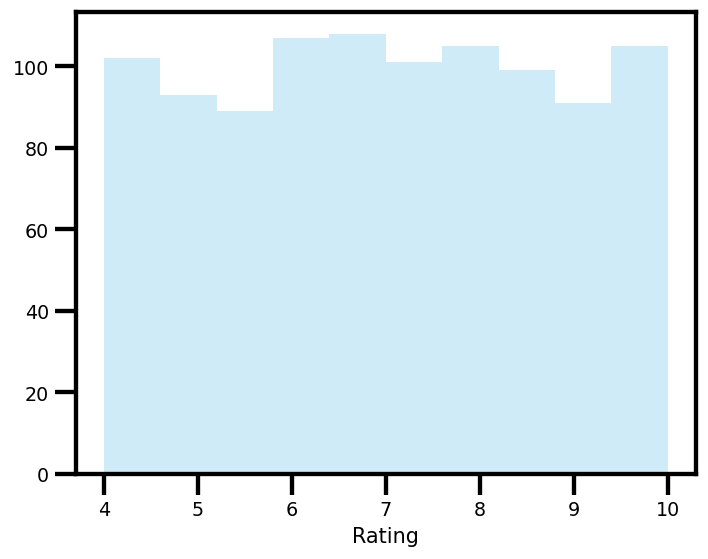

In [440]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(df['Rating'],kde=False)
plt.show()

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


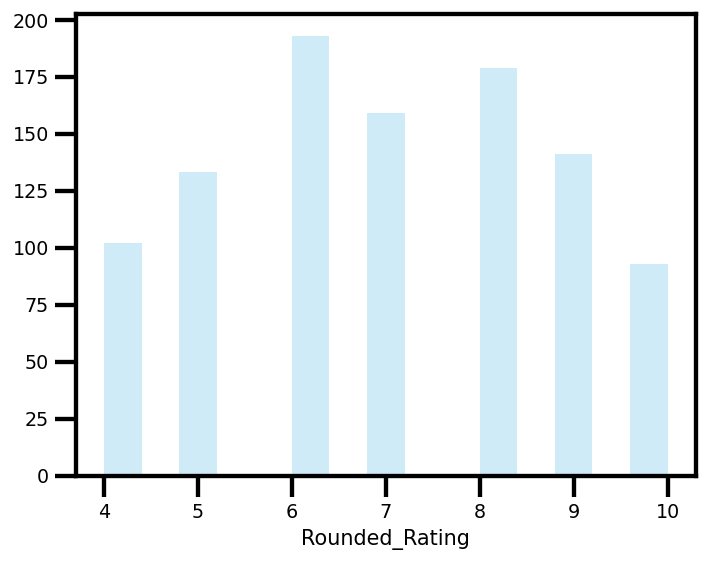

In [439]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(df['Rounded_Rating'],kde=False)
plt.show()